# Lecture 05

In [111]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# sns.set_style('whitegrid')
sns.set_palette('tab10')

# 1.Tree Model

## 1.1.Decision Tree basics

In [112]:
from sklearn.datasets import load_iris 
iris = load_iris(as_frame = True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [113]:
iris_df = iris['frame']
display(iris_df.info(), iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

<AxesSubplot:xlabel='target', ylabel='count'>

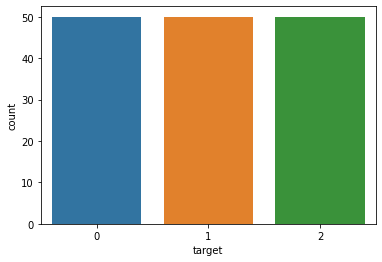

In [114]:
sns.countplot(data=iris_df, x='target', palette='tab10')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

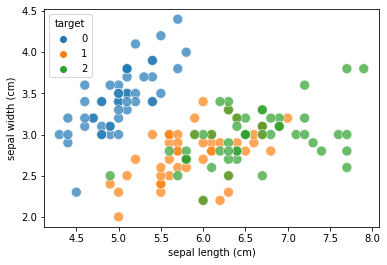

In [115]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')

- Basing on database showing we can separate it easily actually with classification 
- So: Decision, SVM...
- The boudaryline is the condition

# TREE

## DecisionTreeClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [117]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [118]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target']
display(X.head(), y.head())

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [119]:
tree = DecisionTreeClassifier()#creat modedel: Intiniate
tree.fit(X, y)# push the features and target to our model

DecisionTreeClassifier()

Accuracy score:  92.66666666666666


<AxesSubplot:>

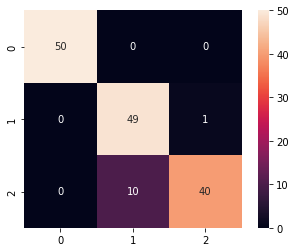

In [120]:
y_pred = tree.predict(X) # re-predict the testvalue
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)
accuracy = metrics.confusion_matrix(y, y_pred)
sns.heatmap(data = accuracy, annot = True, square = True)

In [121]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
# when we call function  we will use it to draw our tree what is the shape of our tree 
# Note and shape this fuction actually very well for next working
#syntax1: visualize_classifier(tree, X, y)
#syntax2: visualize_classifier(forest, X, y)
#syntax3: visualize_classifier(svm, X, y)

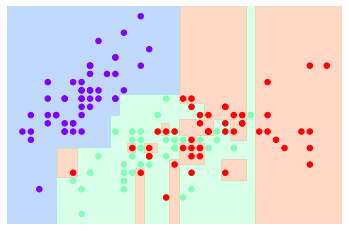

In [122]:
visualize_classifier(tree, X, y)
#syntax: visualize_classifier(tree,X,y)

- It is the lib to know that how to cut our database to show as diagram actualy!
- gini looks like as a ratio

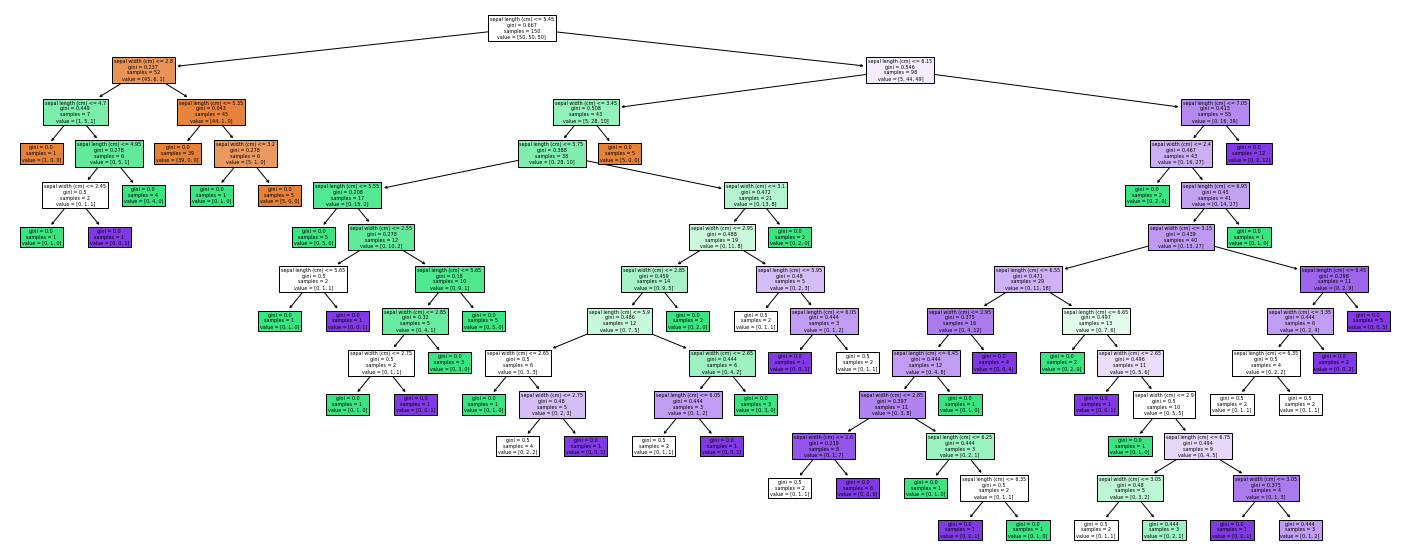

In [123]:
plt.figure(figsize=(25, 10))
_=plot_tree(tree, feature_names=iris_df.columns, max_depth=100, filled=True)

In [124]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 10, 40]])

### Confusion_Matrix
- it can works for more and more elements in target not only 2 values
- ibn this section we have 3 elements in our target

In [125]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<Figure size 504x504 with 0 Axes>

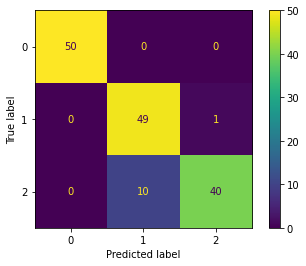

In [126]:
plt.figure(figsize = (7,7))
metrics.plot_confusion_matrix(tree, X, y)

![](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

## Random Forest (Rung Ngau Nghien) TradeMark
- Because dicisiontree cut a lot of time actually
**DecisionTree**
- Normally we train base on our database 
- when we test we have to base on real
- >**SoNOW: We will use bootstrap databse to train our database**
- >**Bootstrap: build on smaller model --> smaller error**
- >**Bootstrap: can bootstrap lengh and width the database**

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [127]:
from sklearn.ensemble import RandomForestClassifier # import the RandomForestcalssififier  from ESEMBLE 

In [128]:
forest = RandomForestClassifier(max_depth = 10) # intinate
forest.fit(X, y)#pushdatabase inside

RandomForestClassifier(max_depth=10)

In [129]:
print(len(forest.estimators_))
forest.estimators_[:5]

100


[DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1736197239),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=665608929),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1531369323),
 DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=98919345),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=351980889)]

In [130]:
y_pred = forest.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)
metrics.accuracy_score(y, y_pred)

Accuracy score:  92.66666666666666


0.9266666666666666

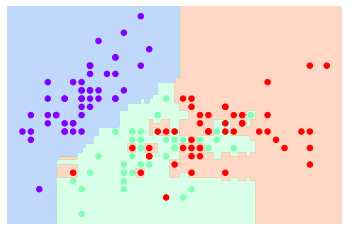

In [131]:
visualize_classifier(forest, X, y)
#always have overfit actually!
#normal to find other way to just forcus that we have Accuracy score

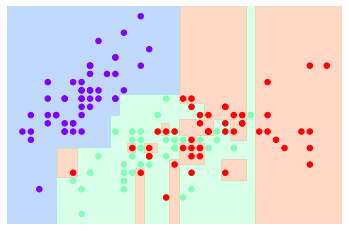

In [41]:
visualize_classifier(tree, X, y)

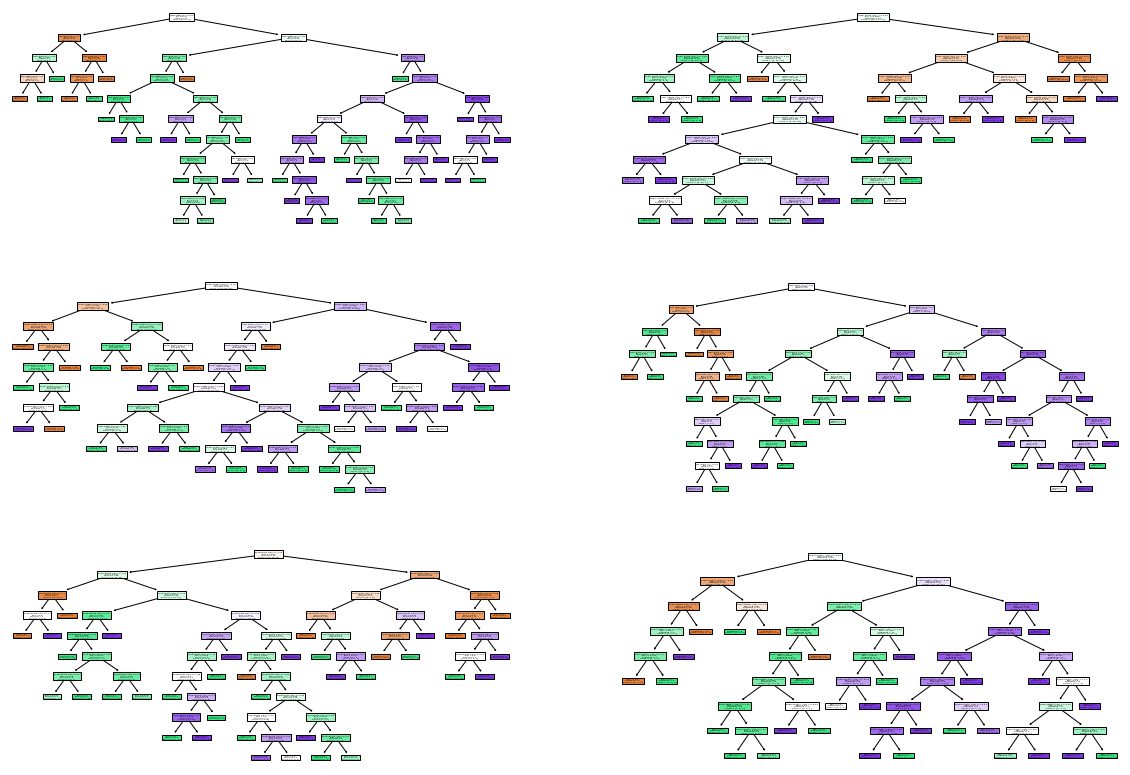

In [42]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))
for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=100, filled=True, ax=ax)

#### We have 100 how to cut our case however all of them will support for good decision

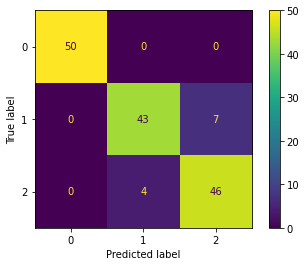

In [43]:
metrics.plot_confusion_matrix(forest, X, y)

# 2.Support Vector Machines

This method devive all database or target to 2 value bianary0 and 1 
In this case which one if greater than 0 will be 1 

<AxesSubplot:xlabel='target_binary', ylabel='count'>

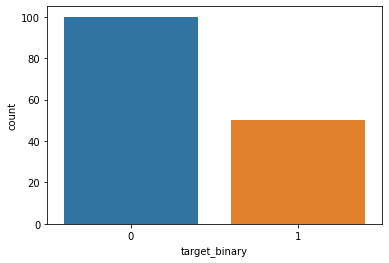

In [58]:
y_binary = y.gt(0).astype(int)# greater than: y>0
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

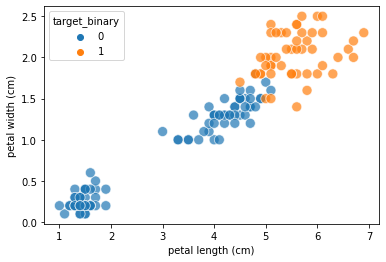

In [59]:
iris_df['target_binary'] = y_binary # create a column more 
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [62]:
X, y = iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target_binary']

In [63]:
from sklearn.svm import SVC # Support Vector Classifier
svc = SVC(kernel='linear') # C = 1.0 -> should be a linear line 
svc.fit(X, y) 

SVC(kernel='linear')

In [65]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  96.66666666666667


In [66]:
# Decision Tree va Random Forest cho ket qua bao nhieu?

In [67]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

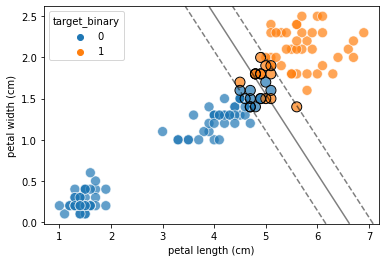

In [68]:
ax = sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

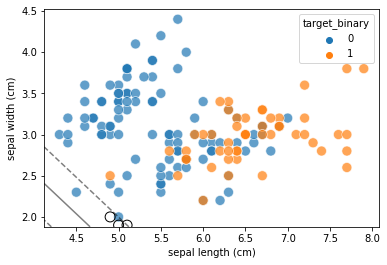

In [69]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [70]:
svc.decision_function

<bound method BaseSVC.decision_function of SVC(kernel='linear')>

In [71]:
svc.support_vectors_

array([[4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

## TreeDecision modelling

In [72]:
tree = DecisionTreeClassifier()#creat modedel: Intiniate
tree.fit(X, y)# push the features and target to our model

DecisionTreeClassifier()

In [73]:
y_pred = tree.predict(X) # re-predict the testvalue
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)
accuracy = metrics.accuracy_score

Accuracy score:  99.33333333333333


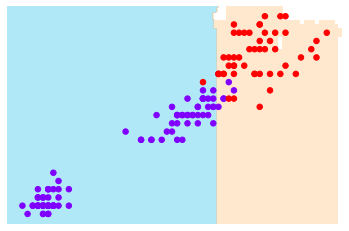

In [74]:
visualize_classifier(forest, X, y)

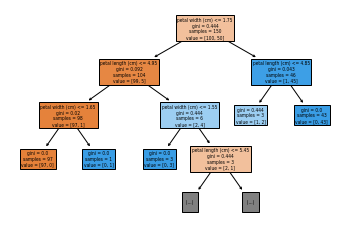

In [75]:
_= plot_tree(tree, feature_names =X.columns , max_depth= 3, filled = True)

### Beyond linear boundaries: Kernel SVM

<AxesSubplot:xlabel='target_binary', ylabel='count'>

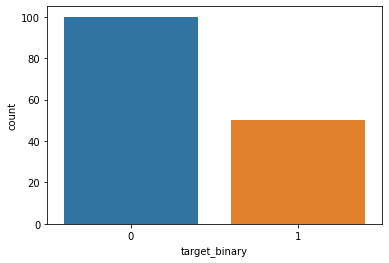

In [76]:
y_binary = y.gt(0).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='target', ylabel='count'>

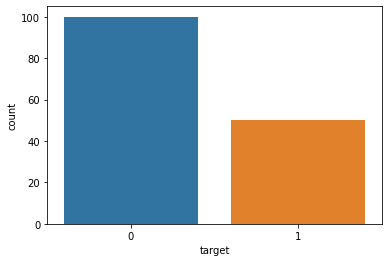

In [77]:
y_binary = iris_df['target'].gt(1).astype(int)#greatthan >1
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

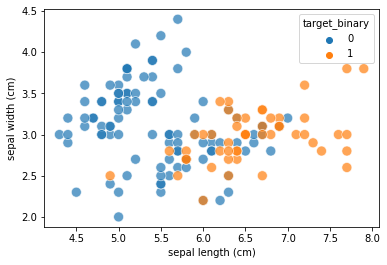

In [78]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [79]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']

In [80]:
svc = SVC(kernel='rbf', C=1000) # C = 1.0
svc.fit(X, y)

SVC(C=1000)

In [81]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  83.33333333333334


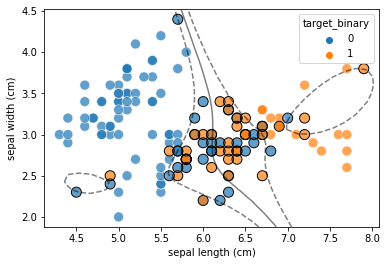

In [82]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [83]:
# BTVN dùng decision tree and random forest để giải bài toán này
# Tính accuracy 
# Confussion matrix

#### **Use Descision Tree**

Accuracy score:  92.66666666666666


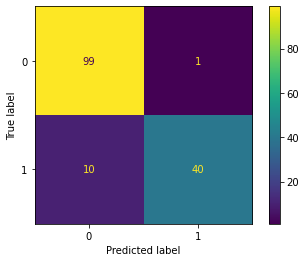

In [84]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']
tree = DecisionTreeClassifier()#creat modedel: Intiniate
tree.fit(X, y)# push the features and target to our model
y_pred = tree.predict(X) # re-predict the testvalue
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)
accuracy = metrics.accuracy_score
metrics.plot_confusion_matrix(tree, X, y)
plt.show()

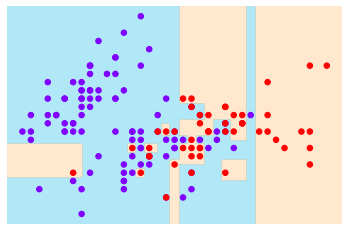

In [85]:
visualize_classifier(tree, X, y)

### **UseRandomForest**

In [86]:
forest = RandomForestClassifier(max_depth = 10) # intinate
forest.fit(X, y)#pushdatabase inside

RandomForestClassifier(max_depth=10)

In [87]:
y_pred = forest.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)
metrics.accuracy_score(y, y_pred)

Accuracy score:  92.66666666666666


0.9266666666666666

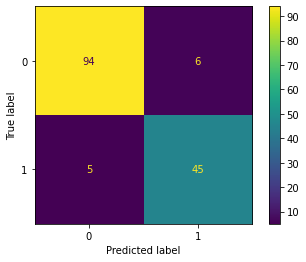

In [88]:
metrics.plot_confusion_matrix(forest, X, y)

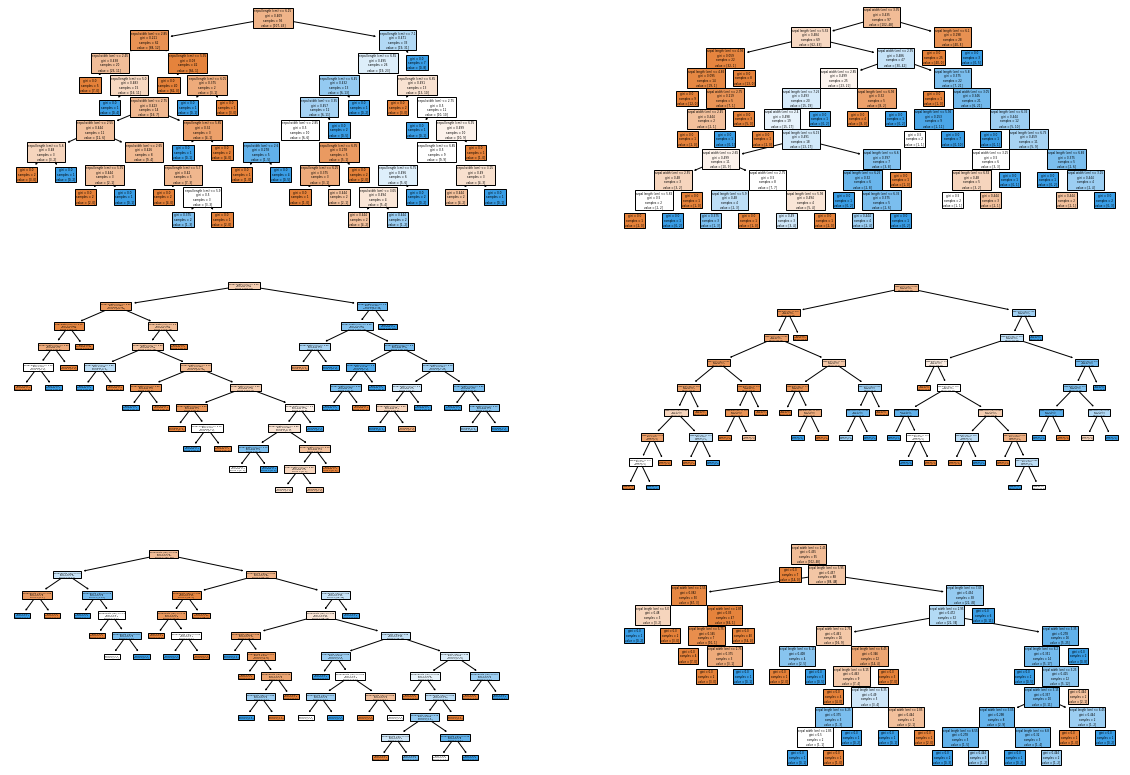

In [89]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))
for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=100, filled=True, ax=ax)

Overfitcao hơn actually!

### SVM

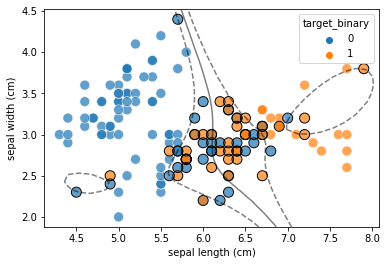

In [90]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

What is the best C value for our target 
'''
- for c in range(0,100):
-    svc = SVC(kernel='linear', C=C) # C = 1.0
-     return svc
   '''

In [91]:
# we have to use threshold -> alot of line however in sci-kit learn they suport for a curve 
svc = SVC(kernel='rbf') # C = 1.0
svc.fit(X, y)

SVC()

In [92]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  82.66666666666667


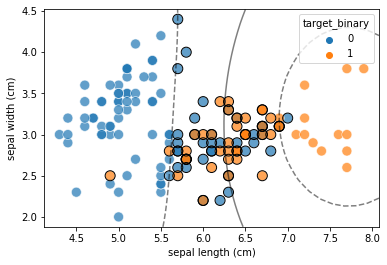

In [93]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

### Tuning the SVM: Softening Margins

In [94]:
svc = SVC(kernel='rbf', C=100) # C = 100.0
svc.fit(X, y)

SVC(C=100)

In [95]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  83.33333333333334


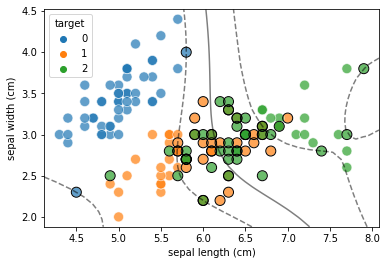

In [96]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

## Regularization Linear Model
Tuyến tính có điều chính

## Model Validation & Cross Validation

In [97]:
from sklearn.model_selection import train_test_split, KFold

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)#random_state =4200

In [99]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 2)

(30, 2)

(120,)

(30,)

In [105]:
tree = DecisionTreeClassifier()

In [106]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [107]:
y_pred = tree.predict(x_train)

In [108]:
metrics.accuracy_score(y_train, y_pred)

0.925

In [109]:
y_pred = tree.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7666666666666667

## Cross Validation

In [47]:
from sklearn.model_selection import train_test_split, KFold
x_train, y_train, x_text, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [110]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
# when we call function  we will use it to draw our tree what is the shape of our tree 
# Note and shape this fuction actually very well for next working
#syntax1: visualize_classifier(tree, X, y)
#syntax2: visualize_classifier(forest, X, y)